In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/reddit_posts.csv')

In [3]:
df.head()

,subreddit,id:,title,selftext:
0,MTB,g51oh2,Question About Suntour Aion 34,I just ordered this fork from CRC: https://www...
1,MTB,g512qr,Beginner needs advice for new wheels,A few years ago my mountain bike's wheels wher...
2,MTB,g50qzr,Second hand MTB: Scott Scale 80. Opinions needed,Looking to get into some light Mtbing as a fun...
3,MTB,g50b6w,Rear shock options for 2018 Stumpjumper?,I have this bike [https://www.specialized.com...
4,MTB,g503j8,Anyone riding the Nero R or the Selva R? How i...,Thinking about buying the Nero R used as an up...


In [4]:
# Clean up the title of the selftext column
df.rename(columns= {'selftext: ': 'selftext'}, inplace= True)

In [5]:
# binarize the target column
df['bin_subreddit'] = df['subreddit'].map({'MTB':1 , 'gravelcycling': 0})

In [6]:
df.head()

,subreddit,id:,title,selftext,bin_subreddit
0,MTB,g51oh2,Question About Suntour Aion 34,I just ordered this fork from CRC: https://www...,1
1,MTB,g512qr,Beginner needs advice for new wheels,A few years ago my mountain bike's wheels wher...,1
2,MTB,g50qzr,Second hand MTB: Scott Scale 80. Opinions needed,Looking to get into some light Mtbing as a fun...,1
3,MTB,g50b6w,Rear shock options for 2018 Stumpjumper?,I have this bike [https://www.specialized.com...,1
4,MTB,g503j8,Anyone riding the Nero R or the Selva R? How i...,Thinking about buying the Nero R used as an up...,1


In [7]:
df.tail()

,subreddit,id:,title,selftext,bin_subreddit
1995,gravelcycling,arq37z,"Wheel suggestions , nothing fancy",I’m looking to swap the wheels on my Specializ...,0
1996,gravelcycling,aqyhw2,Washington Gravel Grinders??,Any Washington (State) gravel riders on here? ...,0
1997,gravelcycling,aqqpr5,700c gravel tires on a Salsa Cuthroat - has an...,I have a Salsa Cuthroat that I will be using f...,0
1998,gravelcycling,aqqjj5,Specialized Sawtooth Tires,"Hi Guys,\n\nSo I picked up a new Specialized D...",0
1999,gravelcycling,apxvqb,Di2 wires and battery,I’m putting together a 1x with Dura Ace levers...,0


## EDA

### Vectorize the text

In [8]:
# Instantiate cvec
cvec = CountVectorizer(stop_words= 'english')

In [9]:
# Fit
cvec.fit(df['selftext']);

In [10]:
# Transform
cvec_matrix = cvec.transform(df['selftext'])

In [11]:
# Put the cvec_matrix into a dataframe
cvec_df = pd.DataFrame(cvec_matrix.todense(), columns=cvec.get_feature_names())

C:\Users\jgjga\anaconda3\envs\tfkGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
cvec_df.head(2)

,00,000,0000000006173_rev_a_service_manual_2018,001,01,017,02,021,03,035,...,zippy,zm2qh57ni3t41,zone,zr,ztr,zwift,zxdoobcad7i,zxreuyn,zykz55v2gfo41,öhlins
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a new dataframe with both the original data and the countvectorized text

In [13]:
# Create a new dataframe with both the original data and the countvectorized text
orig_and_cvec_df = pd.concat([df, cvec_df], axis = 1)

In [14]:
orig_and_cvec_df.head(2)

,subreddit,id:,title,selftext,bin_subreddit,00,000,0000000006173_rev_a_service_manual_2018,001,01,...,zippy,zm2qh57ni3t41,zone,zr,ztr,zwift,zxdoobcad7i,zxreuyn,zykz55v2gfo41,öhlins
0,MTB,g51oh2,Question About Suntour Aion 34,I just ordered this fork from CRC: https://www...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MTB,g512qr,Beginner needs advice for new wheels,A few years ago my mountain bike's wheels wher...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Common Words

In [15]:
ignore_cols = ['subreddit', 'id: ', 'title', 'selftext', 'bin_subreddit']

#### 15 most common words in "MTB"

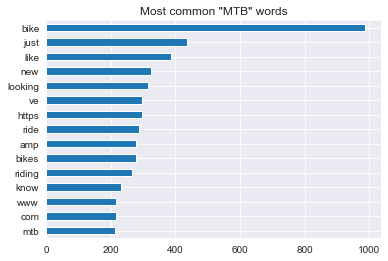

In [16]:
sns.set_style('darkgrid')

orig_and_cvec_df[orig_and_cvec_df['bin_subreddit'] == 1].drop(columns = ignore_cols).sum().sort_values(
    ascending= True).tail(15).plot(kind ='barh')

plt.title('Most common "MTB" words');

#### 15 most common words in "gravelcycling"

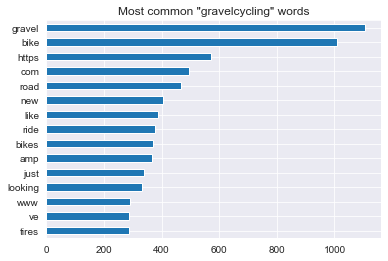

In [17]:
orig_and_cvec_df[orig_and_cvec_df['bin_subreddit'] == 0].drop(columns = ignore_cols).sum().sort_values(
    ascending= True).tail(15).plot(kind ='barh')

plt.title('Most common "gravelcycling" words');

#### Most frequent words comparison

In [18]:
top_words_df = orig_and_cvec_df.groupby('bin_subreddit'
                                       ).sum().T.sort_values(1, ascending=False).head(20).sort_values(1)

In [19]:
top_words_df

bin_subreddit,0,1
really,186,188
thanks,188,188
good,176,198
mountain,87,201
want,186,203
mtb,84,213
com,496,216
www,292,217
know,271,232
riding,257,266


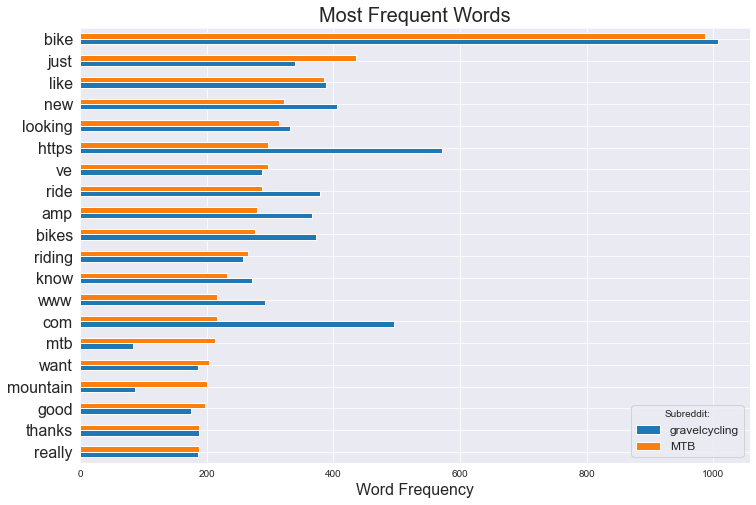

In [20]:
top_words_df.plot(kind='barh', figsize=(12, 8))

plt.title('Most Frequent Words', fontsize = 20)

plt.xlabel('Word Frequency', fontsize = 16)

plt.legend(title = 'Subreddit:', labels = ['gravelcycling', 'MTB'], fontsize = 12)

plt.yticks(fontsize = 16)

plt.savefig('../data-visualizations/most_freq_words.png')

#### Show the top 50 most frequent words in order to build out a list of additional stopwords

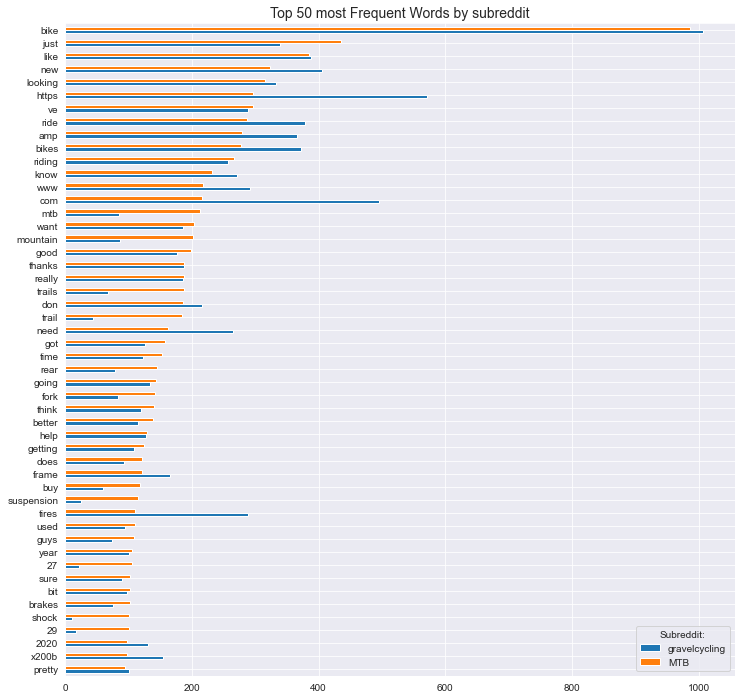

In [21]:
orig_and_cvec_df.groupby('bin_subreddit'
                        ).sum().T.sort_values(1, ascending=False
                                             ).head(50).sort_values(1).plot(kind='barh', figsize=(12, 12))

plt.legend(title = 'Subreddit:', labels = ['gravelcycling', 'MTB'], fontsize = 10)
plt.title('Top 50 most Frequent Words by subreddit', fontsize = 14);

The 'Top 50 most Frequent Words by subreddit' chart shows several common words that appear in both subreddits, but what if we want to get the words that are both common and appear a lot more in one subreddit than the other?

In [22]:
# Create a new dataframe that will hold the word frequencies for each subreddit

diff_df = pd.DataFrame(orig_and_cvec_df.groupby('bin_subreddit').sum().T)

diff_df

bin_subreddit,0,1
00,2,4
000,6,5
0000000006173_rev_a_service_manual_2018,0,1
001,1,0
01,23,0
...,...,...
zwift,2,0
zxdoobcad7i,2,0
zxreuyn,1,0
zykz55v2gfo41,0,1


In [23]:
# Create the largest_diffs dataframe - this will take the difference between subreddits for a given word. 
# Eg. Words that occur more in 'MTB' than 'gravelcycling' will be positive numbers, and the inverse
# will be negative numbers. Then set the largest_diffs dataframe equal to the 15 largest and smallest numbers.

largest_diffs = (diff_df.iloc[:][1] - diff_df.iloc[:][0]).sort_values(ascending = False).head(15)
largest_diffs = largest_diffs.append((diff_df.iloc[:][1] - diff_df.iloc[:][0]
                                           ).sort_values(ascending = False).tail(15))

In [24]:
largest_diffs_df = largest_diffs.to_frame().reset_index()

largest_diffs_df.rename(columns= {'index': 'Frequency'}, inplace= True)

largest_diffs_df

,Frequency,0
0,trail,141
1,mtb,129
2,trails,119
3,mountain,114
4,just,97
5,suspension,90
6,shock,89
7,27,83
8,29,83
9,fox,77


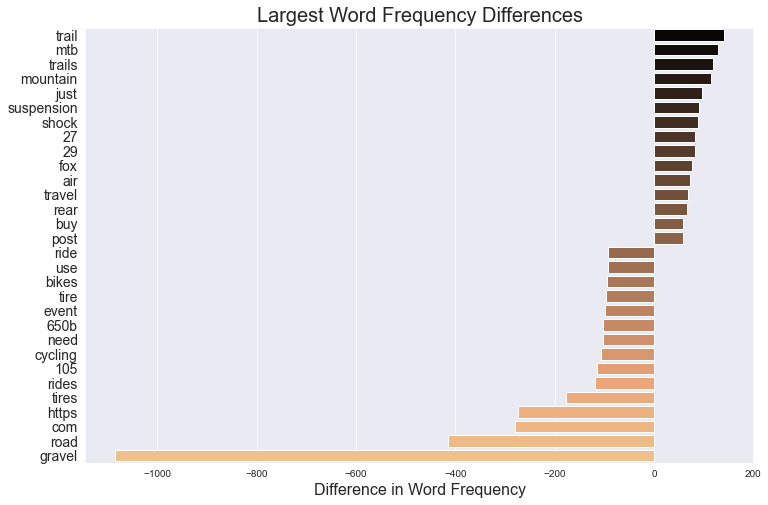

In [25]:
# Plot the largest_diffs dataframe

plt.figure(figsize = (12, 8))

sns.barplot(x=0, y= "Frequency" , data= largest_diffs_df, palette= 'copper')

plt.title('Largest Word Frequency Differences', fontsize = 20)
plt.xlabel('Difference in Word Frequency', fontsize = 16)
plt.ylabel('')
plt.yticks(fontsize = 14);

plt.savefig('../data-visualizations/largest_word_freq_diffs.png')

Now create a list of additional stopwords that appear a lot more in one subreddit than the other, but obviously have no actual relation to the topic of that particular subreddit. Eg. words like 'www' and 'bikes' which could easily appear in either subreddit.

In [26]:
from sklearn.feature_extraction import text 

exclude_words = ['www', 'com', 'new', 'https', 'ride', 'amp', 'bikes', 
                 'know', 'got', 'time', 'does', 'buy', '2020', 'x200b',
                 'race', 'event']

# Add the custom stopwords from 'exclude_words' to the original list of 'english' stopwords
cust_stop_words = text.ENGLISH_STOP_WORDS.union(exclude_words)

#### These are the stopwords that were tested, and the impact that they had on the performance of the Logistic Regression TF-IDF model (scores shown below in the modeling section) <br>

In [27]:
# Worse: 'just', 'need','rear', 'guys', 'use', 'rides', 'road'
# Same (included): 'new', 'know', 'got', 'time', 'does', 'buy', '2020', 'race', 'event'
# Better: 'www', 'com', 'https', 'ride', 'amp', 'bikes', 'x200b'

## Baseline Accuracy

In [28]:
# The baseline accuracy is 50% if we predict 0 (gravelcycling) for everything
df['bin_subreddit'].value_counts(normalize= True) 

1    0.5
0    0.5
Name: bin_subreddit, dtype: float64

## Modeling

In [29]:
# Get X and y
X = df['selftext']
y = df['bin_subreddit']

In [30]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

### Logistic Regression with TF-IDF

In [31]:
# Set up a pipeline with tf-idf vectorizer

logreg_pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', LogisticRegression())
])

In [32]:
eng_params = {
    'tvec__stop_words': ['english'],
    'model__C': [.65, .7, .75],
    'model__max_iter': [50, 75, 100]
}

cust_params = {
    'tvec__stop_words': [cust_stop_words],
    'model__C': [.65, .7, .75],
    'model__max_iter': [50, 75, 100]
}

In [33]:
# Instantiate GridSearchCV twice in order to compare the results of the basic 'english'
# stopwords and the custom stopwords list

# Using the basic 'english' stopwords
logreg_gs_tvec_eng = GridSearchCV(logreg_pipe_tvec,
                        param_grid = eng_params,
                        cv=5)

# Using the custom stopwords list
logreg_gs_tvec_cust = GridSearchCV(logreg_pipe_tvec,
                        param_grid = cust_params,
                        cv=5)

In [34]:
# Fit GridSearch to training data and get best parameters
logreg_gs_tvec_eng.fit(X_train, y_train)
logreg_gs_tvec_cust.fit(X_train, y_train);

print(f'Best params with "english" stopwords: {logreg_gs_tvec_eng.best_params_}')
print(f'Best params with custom stopwords: {logreg_gs_tvec_cust.best_params_}')

Best params with "english" stopwords: {'model__C': 0.75, 'model__max_iter': 50, 'tvec__stop_words': 'english'}
Best params with custom stopwords: {'model__C': 0.7, 'model__max_iter': 50, 'tvec__stop_words': frozenset({'whenever', 'whence', 'everywhere', 'eight', 'com', 'everything', 'done', 'below', 'behind', 'do', 'nine', 'thereby', 'thus', 'by', 'sixty', 'ever', 'keep', 'him', 'somewhere', 'get', 'be', 'several', 'www', 'on', 'most', 'being', 'third', 'bill', 'seems', 'eg', 'between', 'been', 'elsewhere', 'among', 'our', 'seemed', 'further', 'whom', 'describe', 'their', 'beyond', 'etc', 'had', 'amount', 'may', 'ten', 'whereas', 'hence', 'time', 'often', 'hers', 'one', 'must', 'because', 'anyone', 'upon', 'from', 'namely', 'should', 'whereafter', 'well', 'anywhere', 'hereafter', 'but', 'me', 'too', 'four', 'twenty', 'yourselves', 'while', 'through', 'indeed', 'over', 'these', 'cant', 'top', 'afterwards', 'fifteen', 'beside', 'none', 'three', 'does', 'un', 'whereby', 'two', 'cannot', '

In [35]:
# Model scores
print('ENG uses the basic "english" stopwords list, while Cust uses the same "english" stopwords plus the ones')
print('that were defined manually in the code blocks above. \n')

print('ENG Train: ', logreg_gs_tvec_eng.score(X_train, y_train))
print('ENG Test: ', logreg_gs_tvec_eng.score(X_test, y_test))
print('\n')

print('Cust Train: ', logreg_gs_tvec_cust.score(X_train, y_train))
print('Cust Test: ', logreg_gs_tvec_cust.score(X_test, y_test))

ENG uses the basic "english" stopwords list, while Cust uses the same "english" stopwords plus the ones
that were defined manually in the code blocks above. 

ENG Train:  0.9706666666666667
ENG Test:  0.866


Cust Train:  0.9713333333333334
Cust Test:  0.88


#### Since the custom stopwords list seems to improve the performance of the model on both train and test data, we will use it as the default stopwords list from this point on.

C:\Users\jgjga\anaconda3\envs\tfkGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


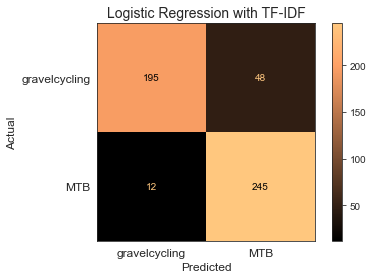

In [36]:
# Show the results from the Logistic Regression TF-IDF model on a confusion matrix

sns.set_style('white')

plt.figsize = (10, 10)

plot_confusion_matrix(logreg_gs_tvec_cust, X_test, y_test, display_labels = ['gravelcycling', 'MTB'], cmap = 'copper')

plt.title('Logistic Regression with TF-IDF', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks(fontsize = 12)

plt.ylabel('Actual', fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('../data-visualizations/logreg_tfidf.png');

In [37]:
logreg_tvec_gs_preds = logreg_gs_tvec_cust.predict(X_test)

### Logistic Regression with CountVectorizer

In [38]:
logreg_pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

In [39]:
logreg_pipe_cvec_params = {
    'cvec__stop_words': [cust_stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [ 4, 5, 6 ],
    'model__C': [.6, .65, .7],
    'model__max_iter': [75, 100, 125]
}

In [40]:
# instantiate and fit
logreg_gs_cvec = GridSearchCV(logreg_pipe_cvec, param_grid = logreg_pipe_cvec_params)

logreg_gs_cvec.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'cvec__min_df': [4, 5, 6],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [frozenset({'2020', 'a', 'about',
                                                         'above', 'across',
                                                         'after', 'afterwards',
                                                         'again', 'against',
                                                         'all', 'almost',
                                                         'alone', 'along',
                                                         'already', 'also',
                                                         'although', 'always',
                                                         'am', 'among',
                                                      

In [41]:
# Logistic Regression with CVEC model scores
print('Train: ', logreg_gs_cvec.score(X_train, y_train))
print('Test: ', logreg_gs_cvec.score(X_test, y_test))

Train:  0.9933333333333333
Test:  0.876


C:\Users\jgjga\anaconda3\envs\tfkGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


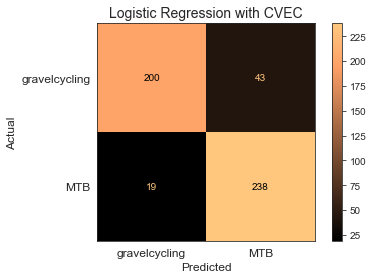

In [42]:
# Plot the Logistic Regression with CVEC model with a confusion matrix

plot_confusion_matrix(logreg_gs_cvec, X_test, y_test, display_labels = ['gravelcycling', 'MTB'], cmap = 'copper')

plt.title('Logistic Regression with CVEC', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks(fontsize = 12)

plt.ylabel('Actual', fontsize = 12)
plt.yticks(fontsize = 12);

plt.savefig('../data-visualizations/logreg_cvec.png')

In [43]:
logreg_cvec_gs_preds = logreg_gs_cvec.predict(X_test)

### Random Forest with CVEC

In [44]:
rf_pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', RandomForestClassifier())
])

In [45]:
rf_pipe_params_cvec = {
    'cvec__stop_words': [cust_stop_words],
     'cvec__ngram_range': [(1, 1), (1, 2)],
     'cvec__min_df': [4, 5],
     'cvec__max_df': [.4, .45, .5],
     'model__max_depth': [7, 8],
     'model__n_estimators': [50, 75, 100]
}

In [46]:
# Instantiate and fit
rf_gs_cvec = GridSearchCV(rf_pipe_cvec, param_grid= rf_pipe_params_cvec)

rf_gs_cvec.fit(X_train, y_train);

In [47]:
# Random Forest with CVEC model scores
print('Train: ', rf_gs_cvec.score(X_train, y_train))
print('Test: ', rf_gs_cvec.score(X_test, y_test))

Train:  0.868
Test:  0.85


C:\Users\jgjga\anaconda3\envs\tfkGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


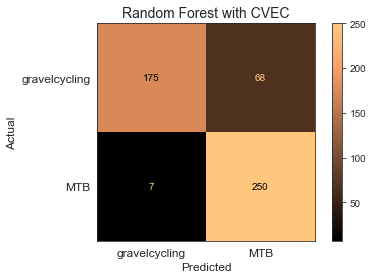

In [48]:
# Plot with a confusion matrix

plot_confusion_matrix(rf_gs_cvec, X_test, y_test, display_labels = ['gravelcycling', 'MTB'], cmap = 'copper')

plt.title('Random Forest with CVEC', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks(fontsize = 12)

plt.ylabel('Actual', fontsize = 12)
plt.yticks(fontsize = 12);

plt.savefig('../data-visualizations/rf_cvec.png')

In [49]:
rf_cvec_gs_preds = rf_gs_cvec.predict(X_test)

### RandomForest with TF-IDF

In [50]:
rf_pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', RandomForestClassifier())
])

In [51]:
rf_pipe_params_tvec = {
    'tvec__max_features': [3_000, 4_000, None],
    'tvec__stop_words': [cust_stop_words],
    'model__max_depth': [7, 8],
    'model__n_estimators': [75, 100],
    'model__min_samples_split': [2, 3],
} 

In [52]:
# Instantiate and fit
rf_gs_tvec = GridSearchCV(rf_pipe_tvec, param_grid= rf_pipe_params_tvec)

rf_gs_tvec.fit(X_train, y_train);

In [53]:
# RandomForest with TF-IDF Model scores
print('Train: ', rf_gs_tvec.score(X_train, y_train))
print('Test: ', rf_gs_tvec.score(X_test, y_test))

Train:  0.9006666666666666
Test:  0.848


C:\Users\jgjga\anaconda3\envs\tfkGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


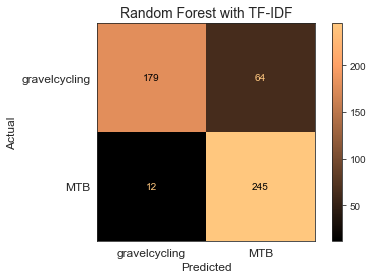

In [54]:
# Plot the model with a confusion matrix

plot_confusion_matrix(rf_gs_tvec, X_test, y_test, display_labels = ['gravelcycling', 'MTB'], cmap = 'copper')

plt.title('Random Forest with TF-IDF', fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks(fontsize = 12)

plt.ylabel('Actual', fontsize = 12)
plt.yticks(fontsize = 12);

plt.savefig('../data-visualizations/rf_tfidf.png')

In [55]:
rf_tvec_gs_preds = rf_gs_tvec.predict(X_test)